## Multi_Taste Cascaded Convolutional Neural Network

In [3]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN

In [5]:
pixels = plt.imread("img/crowd_people.jpg")
detector = MTCNN()
faces = detector.detect_faces(pixels)

for face in faces:
    print(face)

4/4 [==============================] - 0s 16ms/step
{'box': [68, 25, 40, 53], 'confidence': 0.9999973177909851, 'keypoints': {'left_eye': (78, 47), 'right_eye': (95, 43), 'nose': (88, 59), 'mouth_left': (82, 64), 'mouth_right': (100, 60)}}
{'box': [268, 225, 61, 79], 'confidence': 0.9999940991401672, 'keypoints': {'left_eye': (285, 256), 'right_eye': (311, 255), 'nose': (299, 275), 'mouth_left': (286, 282), 'mouth_right': (312, 281)}}
{'box': [501, 351, 69, 90], 'confidence': 0.9999678730964661, 'keypoints': {'left_eye': (515, 387), 'right_eye': (548, 391), 'nose': (526, 412), 'mouth_left': (512, 417), 'mouth_right': (546, 421)}}
{'box': [678, 59, 48, 63], 'confidence': 0.9999651908874512, 'keypoints': {'left_eye': (696, 83), 'right_eye': (717, 88), 'nose': (706, 99), 'mouth_left': (693, 106), 'mouth_right': (710, 110)}}
{'box': [635, 106, 55, 75], 'confidence': 0.9999492764472961, 'keypoints': {'left_eye': (646, 135), 'right_eye': (670, 135), 'nose': (654, 150), 'mouth_left': (645, 16

In [28]:
pixels = plt.imread("img/hurt.jpg")
faces = detector.detect_faces(pixels)
detector = MTCNN()
for face in faces:
    print(face)

1/1 [==============================] - 0s 114ms/step
{'box': [377, 94, 241, 330], 'confidence': 0.9999990463256836, 'keypoints': {'left_eye': (452, 216), 'right_eye': (560, 220), 'nose': (501, 288), 'mouth_left': (452, 347), 'mouth_right': (533, 354)}}


In [23]:
pixels = plt.imread("img/hocsinh.jpg")
faces = detector.detect_faces(pixels)
detector = MTCNN()
for face in faces:
    print(face)

4/4 [==============================] - 0s 14ms/step
{'box': [468, 253, 24, 34], 'confidence': 0.9997713565826416, 'keypoints': {'left_eye': (476, 266), 'right_eye': (487, 266), 'nose': (482, 273), 'mouth_left': (477, 279), 'mouth_right': (487, 279)}}
{'box': [539, 189, 12, 15], 'confidence': 0.999449610710144, 'keypoints': {'left_eye': (543, 193), 'right_eye': (549, 194), 'nose': (547, 197), 'mouth_left': (544, 200), 'mouth_right': (549, 200)}}
{'box': [678, 267, 26, 33], 'confidence': 0.9993894696235657, 'keypoints': {'left_eye': (687, 279), 'right_eye': (699, 281), 'nose': (692, 287), 'mouth_left': (684, 289), 'mouth_right': (697, 292)}}
{'box': [489, 187, 12, 17], 'confidence': 0.998623788356781, 'keypoints': {'left_eye': (492, 193), 'right_eye': (498, 194), 'nose': (496, 198), 'mouth_left': (493, 201), 'mouth_right': (497, 201)}}
{'box': [396, 264, 25, 35], 'confidence': 0.9985564351081848, 'keypoints': {'left_eye': (403, 277), 'right_eye': (415, 276), 'nose': (409, 282), 'mouth_le

In [26]:
pixels = plt.imread("img/one_eyes.jpeg")
faces = detector.detect_faces(pixels)
detector = MTCNN()
for face in faces:
    print(face)

1/1 [==============================] - 0s 109ms/step
{'box': [66, 25, 103, 147], 'confidence': 0.9770475625991821, 'keypoints': {'left_eye': (94, 80), 'right_eye': (138, 79), 'nose': (114, 112), 'mouth_left': (99, 140), 'mouth_right': (135, 139)}}


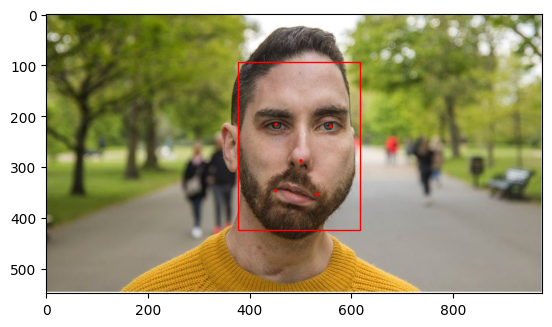

In [29]:
plt.imshow(pixels)
ax = plt.gca()
for face in faces:
    x,y,w,h = face["box"]
    rect = plt.Rectangle((x,y),w,h,fill = False, color = "red")
    ax.add_patch(rect)
    for key,value in face["keypoints"].items():
        dot = plt.Circle(value,radius=2,color ="red")
        ax.add_patch(dot)
plt.show()

In [36]:
import cv2
from mtcnn import MTCNN

import numpy as np
import time


prev_frame_time = 0
new_frame_time = 0

mtcnn = MTCNN( )

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH,640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,480)
while cap.isOpened():
    isSuccess, frame = cap.read()
    if isSuccess:
        boxes, _, points_list = mtcnn.detect(frame, landmarks=True)
        if boxes is not None:
            for box in boxes:
                bbox = list(map(int,box.tolist()))
                frame = cv2.rectangle(frame,(bbox[0],bbox[1]),(bbox[2],bbox[3]),(0,0,255),6)

    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = str(int(fps))
    cv2.putText(frame, fps, (7, 70), cv2.FONT_HERSHEY_DUPLEX, 3, (100, 255, 0), 3, cv2.LINE_AA)
    cv2.imshow('Face Detection', frame)
    if cv2.waitKey(1)&0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()        

[ WARN:0@2591.329] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.6.0) /io/opencv/modules/highgui/src/window.cpp:1261: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [33]:
pip install torch
pip install facenet_pytorch

SyntaxError: invalid syntax (2571973181.py, line 1)